# Data Preprocessing Assignment

Dataset used: Titanic Passenger List


## Importing Modules and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [50]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print("Length of train data: " + str(len(train_data)))
print("Length of test data: " + str(len(test_data)))

Length of train data: 899
Length of test data: 418


## Removing Duplicate Values


### Checking For & Removing Duplicates

In [8]:
dups = train_data.duplicated()
print(dups.any())

True


In [9]:
train_data = train_data.drop_duplicates()
print("Length of Train data after removing duplicates: " + str(len(train_data)))

Length of Train data after removing duplicates: 891


## Analysing Data

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 894
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [12]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Looking at the data given above, we can find that 38% of the people in the train data survived. Since the number of records in the dataset is 891, we can conclude that there are missing values in the column "Age".

### Finding Missing Data

In [13]:
missing = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([missing, percent_2], axis=1, keys=['Total', '%'])

missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


From the data above, we can conclude that there are data missing in the columns "Cabin", "Age" and "Embarked". \
The number of missing value in "Cabin" is very large (77.1%), so we could remove this column. \
The rest of the missing values, i.e., for "Age" and "Embarked", should be filled appropriately.

### Finding Columns that doesn't attribute to the result

In [15]:
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

It would be fine to assume that 'Name', 'PassengerId', 'Ticket', 'Fare' doesn't attribute to the result. So they could also be removed.

## Deleting Columns

Analysing the data, we concluded that the columns "Name", "PassengerId", "Ticket", "Cabin", "Fare" could be removed.

In [17]:
del train_data["Name"]
del train_data["PassengerId"]
del train_data["Fare"]
del train_data["Ticket"]
del train_data["Cabin"]

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


## Filling Missing Data

The columns "Age" and "Embarked" had missing values. These are to filled in appropriately.

### Filling missing "Age"

As seen in the description of the data, the value of age varies from 0.4 to 80. It would make sense to fill the missing values with the mean of the column. \
For those who survived and has a missing age value, those can be filled with the mean age of those survived. Similarly, mean age of those who didn't survive can be used to fill the age value of those who have age missing and didn't survive. 

In [19]:
meanS = train_data[train_data.Survived == 1].Age.mean()
meanNS = train_data[train_data.Survived == 0].Age.mean()

print(meanS)
print(meanNS)

28.343689655172415
30.62617924528302


In [20]:
train_data["Age"] = np.where(pd.isnull(train_data.Age) & train_data["Survived"] == 1, meanS, train_data.Age)
train_data.Age.fillna(meanNS, inplace=True)


### Filling Missing "Embarked"

In [23]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
print(train_data[train_data.Survived == 1][train_data.Embarked == 'S'].shape[0])
print(train_data[train_data.Survived == 1][train_data.Embarked == 'C'].shape[0])
print(train_data[train_data.Survived == 1][train_data.Embarked == 'Q'].shape[0])

217
93
30


<ipython-input-24-d9cab52c6f4d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[train_data.Survived == 1][train_data.Embarked == 'S'].shape[0])
<ipython-input-24-d9cab52c6f4d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[train_data.Survived == 1][train_data.Embarked == 'C'].shape[0])
<ipython-input-24-d9cab52c6f4d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(train_data[train_data.Survived == 1][train_data.Embarked == 'Q'].shape[0])


As seen in the data given above, the value of the column "Embarked" does affect survival of an individual. Now, since the number of missing data in this case is 2, and insignificant, we can remove these 2 rows.

In [25]:
# The only nan values are in Embarked. So we can use dropna()
train_data.dropna(inplace=True)

In [26]:
train_data.shape

(889, 7)

### Checking if all the null values have been replaced or removed

In [27]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

## Updating Column Values - Converting to Numerical Values

### Updating data in the column "Sex"
Updating the column "Sex" to values 0 & 1, when Sex=male and Sex=female, respectively.

In [29]:
train_data["Sex"] = np.where(train_data["Sex"] == "male", 0, 1)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


### Updating Values in "Embarked"

The values in Embarked are characters. They can be replaced with integers.

In [31]:
train_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [32]:
train_data.replace(to_replace=['S', 'C', 'Q'], value=[1, 2, 3], inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,1


## Data Representation


### Survival Based on Sex

X axis -> Sex (0 for Male, 1 for Female)
Y axis -> Survived (0 for Didn't survive, 1 for Survived)

<AxesSubplot:xlabel='Sex', ylabel='count'>

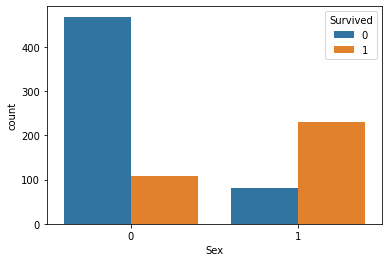

In [37]:
sns.countplot(x=train_data['Sex'], hue = "Survived", data=train_data)

### Survival Based on SibSp

<AxesSubplot:xlabel='SibSp', ylabel='count'>

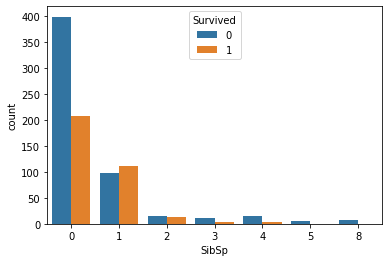

In [34]:
sns.countplot(x=train_data['SibSp'], hue = "Survived", data=train_data)

### Survival based on Parch


<AxesSubplot:xlabel='Parch', ylabel='count'>

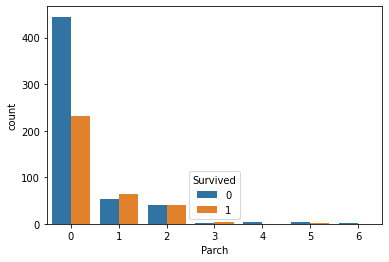

In [35]:
sns.countplot(x=train_data['Parch'], hue = "Survived", data=train_data)

### Survival based on Age


<AxesSubplot:xlabel='Age', ylabel='Count'>

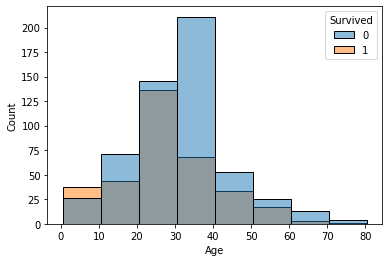

In [46]:
sns.histplot(x=train_data["Age"], hue="Survived", data=train_data, binwidth=10)

## Prediction Model

This is a classifier problem. An individual is to be classified as "Survived" or "Not Survived". \
The classifier model which will be used here is "Random Forest".

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,1


In [42]:
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Embarked"]
X = pd.get_dummies(train_data[features])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [48]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [88]:
output = pd.DataFrame({'Survived': predictions})
output.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [49]:
print(model.score(X_test, y_test))

0.8475336322869955


## References: 
https://www.kaggle.com/anirban7/data-preprocessing-for-beginners \
https://www.kaggle.com/alexisbcook/titanic-tutorial \
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [71]:
# %history -n -o 1-27